In [1]:
'''
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
img = np.array(plt.imread('/content/400px-Normailize_01.png'))
'''

"\nimport numpy as np\n%matplotlib inline\nimport matplotlib.pyplot as plt\nimg = np.array(plt.imread('/content/400px-Normailize_01.png'))\n"

In [0]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

def translate(new_img, shift, direction):
    assert direction in ['right', 'left', 'down', 'up'], 'Directions should be top|up|left|right'
    img = new_img.copy()
    
    if direction == 'right':
        right_slice = img[:,:shift].shape
        img[:, shift:] = img[:, :-shift]
        img[:,:shift] = np.zeros(right_slice)
            
    if direction == 'left':
        left_slice = img[:, -shift:].shape
        img[:, :-shift] = img[:, shift:]
        img[:, -shift:] = np.zeros(left_slice)
    if direction == 'down':
        down_slice = img[:shift, :].shape
        img[shift:, :] = img[:-shift,:]
        img[:shift, :] = np.zeros(down_slice)
    if direction == 'up':
        upper_slice = img[-shift:,:].shape
        img[:-shift, :] = img[shift:, :]
        img[-shift:,:] = np.zeros(upper_slice)
    
    return img


def standard_augmentation():
  def augment(input_img, p=0.5):
    K = 4
    k1 = np.random.randint(-K, K)
    k2 = np.random.randint(-K, K)
    
    img_h, img_w, img_c = input_img.shape
    p_1 = np.random.rand()
    if k1!=0 and k2!=0:
      if k1>0:
        input_img = translate(input_img, shift=abs(k1), direction='up')
      else:
        input_img = translate(input_img, shift=abs(k1), direction='down')

      if k2>0:
        input_img = translate(input_img, shift=abs(k2), direction='right')
      else:
        input_img = translate(input_img, shift=abs(k2), direction='left')

    if p_1 > p:
      input_img = np.fliplr(input_img)
    return input_img
  return augment




In [3]:
'''
def plot_grid(imgs, nrows, ncols, figsize=(10, 10)):
    assert len(imgs) == nrows*ncols, f"Number of images should be {nrows}x{ncols}"
    _, axs = plt.subplots(nrows, ncols, figsize=figsize)
    axs = axs.flatten()
    for img, ax in zip(imgs, axs):
        show_img(img, ax)
def show_img(img, ax):
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img)

plot_grid([translate(img, shift=50, direction='up'),
            translate(img, shift=50, direction='down'), 
            translate(img, shift=50, direction='left'),
            translate(img, shift=50, direction='right')],
            1, 4, figsize=(10, 5))
'''

'\ndef plot_grid(imgs, nrows, ncols, figsize=(10, 10)):\n    assert len(imgs) == nrows*ncols, f"Number of images should be {nrows}x{ncols}"\n    _, axs = plt.subplots(nrows, ncols, figsize=figsize)\n    axs = axs.flatten()\n    for img, ax in zip(imgs, axs):\n        show_img(img, ax)\ndef show_img(img, ax):\n    ax.grid(False)\n    ax.set_xticks([])\n    ax.set_yticks([])\n    ax.imshow(img)\n\nplot_grid([translate(img, shift=50, direction=\'up\'),\n            translate(img, shift=50, direction=\'down\'), \n            translate(img, shift=50, direction=\'left\'),\n            translate(img, shift=50, direction=\'right\')],\n            1, 4, figsize=(10, 5))\n'

Using TensorFlow backend.


170500096/170498071 [==============================] - 9s 0us/step
x_train shape: (10000, 32, 32, 3)
10000 train samples
10000 test samples
y_train shape: (10000, 1)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 16)   64          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)

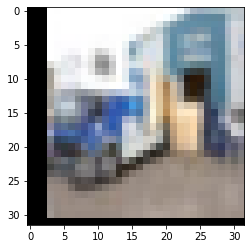

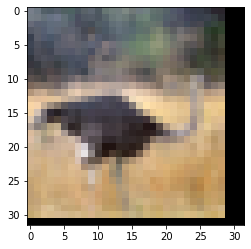

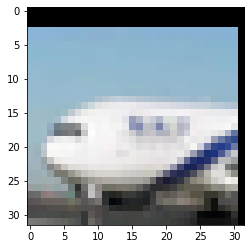

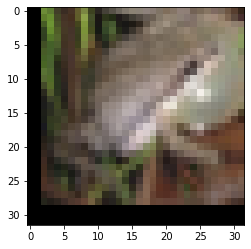

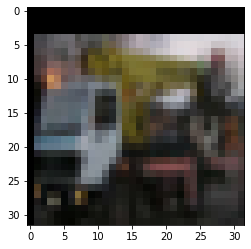

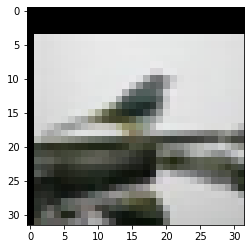

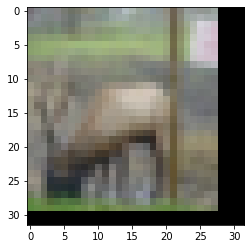

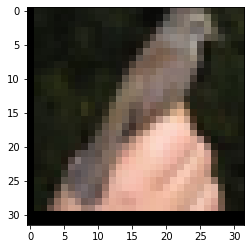

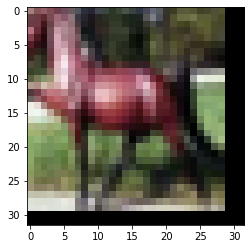

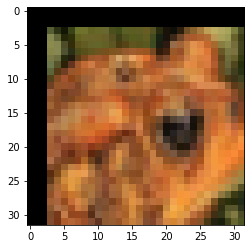

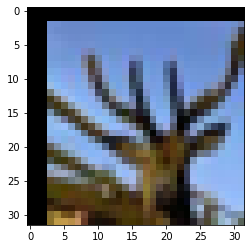

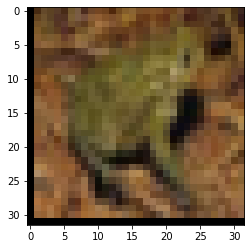

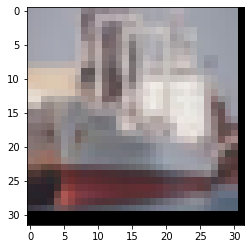

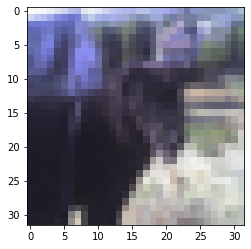

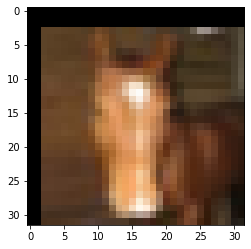

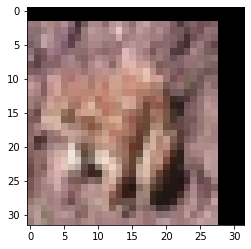

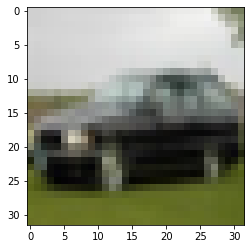

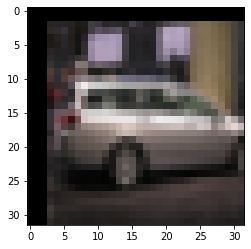

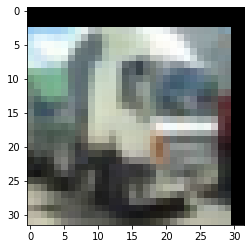

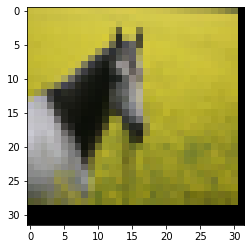

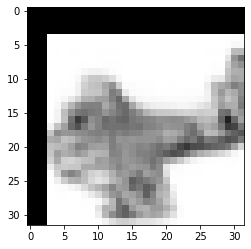

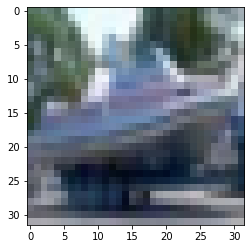

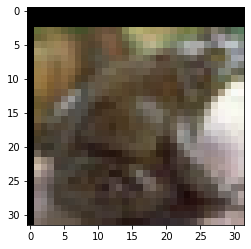

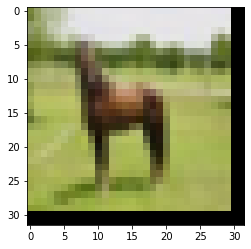

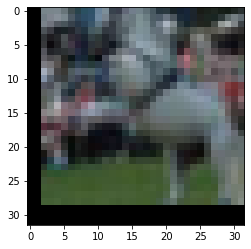

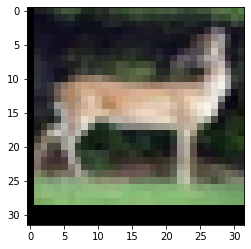

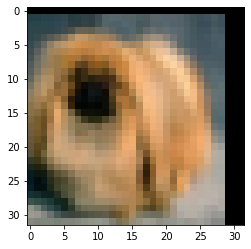

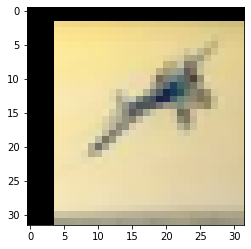

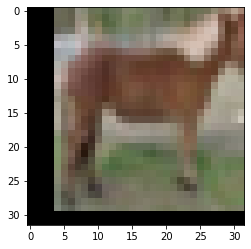

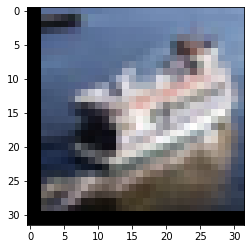

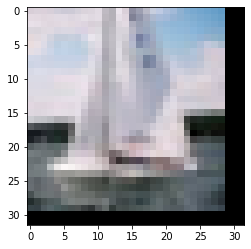

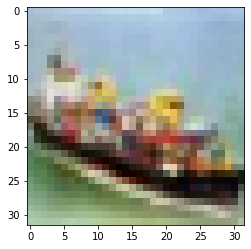

Epoch 1/100
79/79 [==============================] - 239s 3s/step - loss: 2.2871 - accuracy: 0.3103 - val_loss: 3.3893 - val_accuracy: 0.1841
Epoch 2/100
79/79 [==============================] - 236s 3s/step - loss: 1.9658 - accuracy: 0.4270 - val_loss: 5.8490 - val_accuracy: 0.1372
Epoch 3/100
79/79 [==============================] - 235s 3s/step - loss: 1.8213 - accuracy: 0.4786 - val_loss: 4.1957 - val_accuracy: 0.1675
Epoch 4/100
79/79 [==============================] - 231s 3s/step - loss: 1.7215 - accuracy: 0.5076 - val_loss: 3.3868 - val_accuracy: 0.2335
Epoch 5/100
79/79 [==============================] - 232s 3s/step - loss: 1.6319 - accuracy: 0.5471 - val_loss: 1.9832 - val_accuracy: 0.4425
Epoch 6/100
79/79 [==============================] - 237s 3s/step - loss: 1.5493 - accuracy: 0.5753 - val_loss: 1.8763 - val_accuracy: 0.4716
Epoch 7/100
79/79 [==============================] - 232s 3s/step - loss: 1.4689 - accuracy: 0.5984 - val_loss: 1.9623 - val_accuracy: 0.4238
Epoch 

In [4]:
from __future__ import print_function
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import os

# Training parameters
batch_size = 128  # orig paper trained all networks with batch_size=128
epochs = 100
num_classes = 10
pixel_level = False

# Computed depth from supplied model parameter n
depth = 20

# Model name, depth and version
model_type = 'ResNet%dv' % (depth)

# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Input image dimensions.
input_shape = x_train.shape[1:]

# Normalize data.
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#take 10000 samples out of 50000 for training
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, Y_test = train_test_split(x_train, y_train, stratify=y_train, test_size=0.8)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print('y_train shape:', y_train.shape)

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

def resnet_layer(inputs,
                 num_filters=16,
                 kernel_size=3,
                 strides=1,
                 activation='relu',
                 batch_normalization=True,
                 conv_first=True):
    conv = Conv2D(num_filters,
                  kernel_size=kernel_size,
                  strides=strides,
                  padding='same',
                  kernel_initializer='he_normal',
                  kernel_regularizer=l2(1e-4))

 

    x = inputs
    if conv_first:
        x = conv(x)
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
    else:
        if batch_normalization:
            x = BatchNormalization()(x)
        if activation is not None:
            x = Activation(activation)(x)
        x = conv(x)
    return x


def resnet_v2(input_shape, depth, num_classes=10):
    
    if (depth - 2) % 9 != 0:
        raise ValueError('depth should be 9n+2 (eg 56 or 110 in [b])')
    # Start model definition.
    num_filters_in = 16
    num_res_blocks = int((depth - 2) / 9)

    inputs = Input(shape=input_shape)
    # v2 performs Conv2D with BN-ReLU on input before splitting into 2 paths
    x = resnet_layer(inputs=inputs,
                     num_filters=num_filters_in,
                     conv_first=True)

    # Instantiate the stack of residual units
    for stage in range(3):
        for res_block in range(num_res_blocks):
            activation = 'relu'
            batch_normalization = True
            strides = 1
            if stage == 0:
                num_filters_out = num_filters_in * 4
                if res_block == 0:  # first layer and first stage
                    activation = None
                    batch_normalization = False
            else:
                num_filters_out = num_filters_in * 2
                if res_block == 0:  # first layer but not first stage
                    strides = 2    # downsample

            # bottleneck residual unit
            y = resnet_layer(inputs=x,
                             num_filters=num_filters_in,
                             kernel_size=1,
                             strides=strides,
                             activation=activation,
                             batch_normalization=batch_normalization,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_in,
                             conv_first=False)
            y = resnet_layer(inputs=y,
                             num_filters=num_filters_out,
                             kernel_size=1,
                             conv_first=False)
            if res_block == 0:
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,
                                 num_filters=num_filters_out,
                                 kernel_size=1,
                                 strides=strides,
                                 activation=None,
                                 batch_normalization=False)
            x = keras.layers.add([x, y])

        num_filters_in = num_filters_out

    # Add classifier on top.
    # v2 has BN-ReLU before Pooling
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes,
                    activation='softmax',
                    kernel_initializer='he_normal')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model



model = resnet_v2(input_shape=input_shape, depth=depth)


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
model.summary()
print(model_type)

csv_logger = CSVLogger('training.log')


datagen = ImageDataGenerator(
        preprocessing_function=standard_augmentation())

datagen.fit(x_train)

batches = datagen.flow(x_train, y_train, batch_size=batch_size)
x_batch, y_batch = next(batches)
for i in range (0,32):
    image = x_batch[i]
    plt.imshow(image)
    plt.show()

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    validation_data=(x_test, y_test),
                    epochs=epochs, verbose=1, workers=4,
                    callbacks=[csv_logger])
             

# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])